<a href="https://colab.research.google.com/github/mboulestier/logistic_regression/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
import statsmodels.api as sm

# Load the data
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Python business analytics/CreditCard.csv')

# Print the shape of the data
print("Shape of the data:", data.shape)

# Display the first few rows of the data
print(data.head())

# Get summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of the data: (1319, 12)
  card  reports       age  income     share  expenditure owner selfemp  \
0  yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1  yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
2  yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3  yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
4  yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  
           reports          age       income        share  expenditure  \
count  1319.000000  1319.000000  1319.000000  1319.000000 

In [ ]:
# Convert categorical variables ('card', 'owner', 'selfemp') to numerical
data['card'] = data['card'].map({'yes': 1, 'no': 0})
data['owner'] = data['owner'].map({'yes': 1, 'no': 0})
data['selfemp'] = data['selfemp'].map({'yes': 1, 'no': 0})

# Check for any remaining missing values
print(data.isnull().sum())

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64


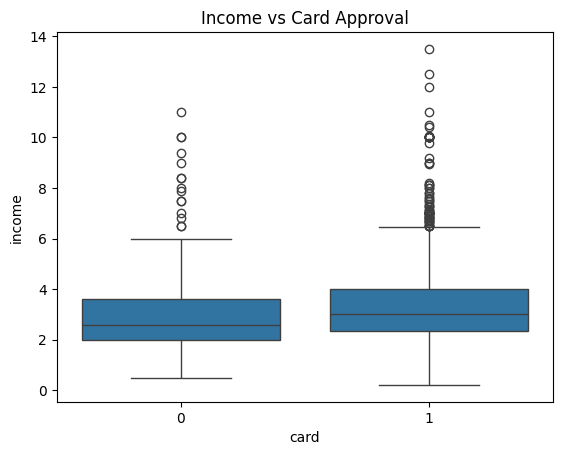

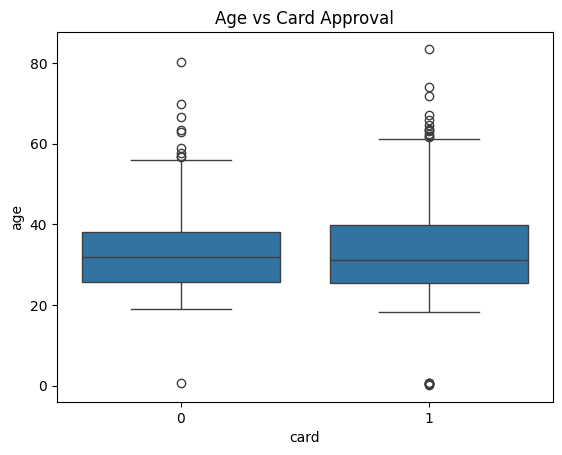

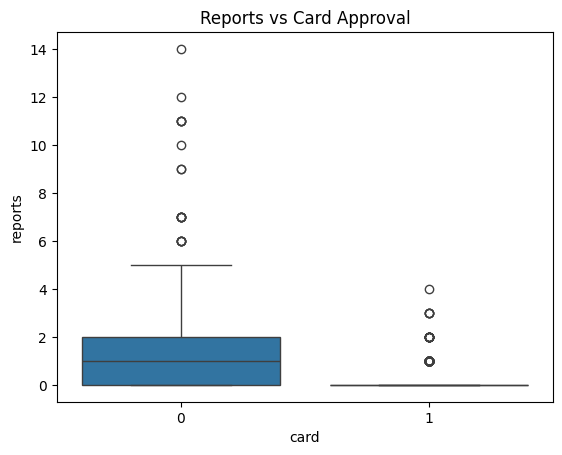

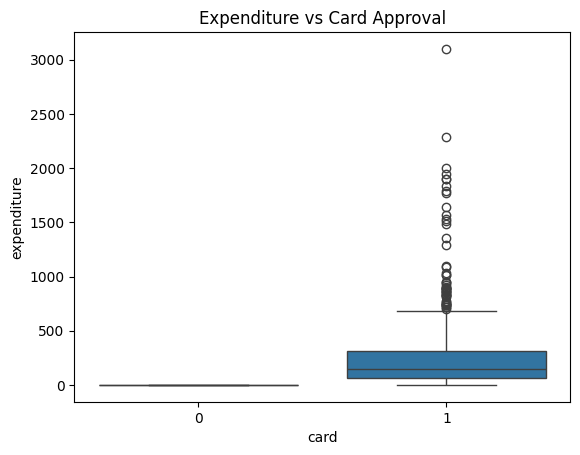

In [ ]:
# Visualizing the distribution of 'income' and 'age' with respect to 'card'
sns.boxplot(x='card', y='income', data=data)
plt.title('Income vs Card Approval')
plt.show()

sns.boxplot(x='card', y='age', data=data)
plt.title('Age vs Card Approval')
plt.show()

# Visualizing 'reports' (credit history) and 'expenditure'
sns.boxplot(x='card', y='reports', data=data)
plt.title('Reports vs Card Approval')
plt.show()

sns.boxplot(x='card', y='expenditure', data=data)
plt.title('Expenditure vs Card Approval')
plt.show()


In [ ]:
# Define independent variables (features) and the target variable
X = data[['reports', 'age', 'income', 'expenditure', 'owner', 'selfemp', 'dependents', 'months', 'majorcards', 'active']]
y = data['card']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

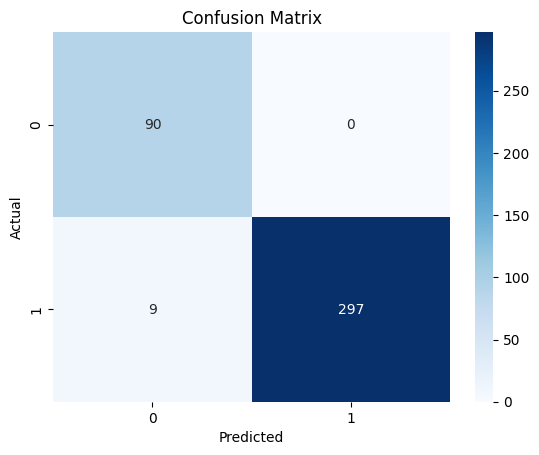

Accuracy: 0.9772727272727273
Recall: 0.9705882352941176
F1 Score: 0.9850746268656716
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        90
           1       1.00      0.97      0.99       306

    accuracy                           0.98       396
   macro avg       0.95      0.99      0.97       396
weighted avg       0.98      0.98      0.98       396



In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(classification_report(y_test, y_pred))

In [ ]:
# Adding a constant for the intercept term
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Predict and calculate metrics
y_pred_sm = result.predict(sm.add_constant(X_test)) > 0.5
y_pred_sm = y_pred_sm.astype(int)

accuracy_sm = accuracy_score(y_test, y_pred_sm)
recall_sm = recall_score(y_test, y_pred_sm)
f1_sm = f1_score(y_test, y_pred_sm)

print(f'Statsmodels Accuracy: {accuracy_sm}')
print(f'Statsmodels Recall: {recall_sm}')
print(f'Statsmodels F1 Score: {f1_sm}')

         Current function value: 0.036070
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   card   No. Observations:                  923
Model:                          Logit   Df Residuals:                      912
Method:                           MLE   Df Model:                           10
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                  0.9321
Time:                        02:45:10   Log-Likelihood:                -33.292
converged:                      False   LL-Null:                       -490.03
Covariance Type:            nonrobust   LLR p-value:                8.010e-190
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.3823      1.333     -2.537      0.011      -5.995      -0.769
reports       -19.0793   6688.609     -0.003      0.998   -1.3

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
